In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task.csv')

In [3]:
data

,Experience,Success
0,14,0
1,29,0
2,6,0
3,25,1
4,18,1
5,4,0
6,18,0
7,12,0
8,22,1
9,6,0


In [4]:
experience = data.Experience

In [5]:
experience1 = data.iloc[:,:1]
# adding 1s to conver to dataframe

In [6]:
type(experience1)

pandas.core.frame.DataFrame

In [7]:
experience1["constant"] = 1
experience[:5]

0    14
1    29
2     6
3    25
4    18
Name: Experience, dtype: int64

In [8]:
# reorder cols
experience1 = experience1[['constant','Experience']]
experience1[:5]

,constant,Experience
0,1,14
1,1,29
2,1,6
3,1,25
4,1,18


In [9]:
success = data.Success

In [10]:
n = len(success)
n

25

## Statsmodels GLM

In [11]:
import statsmodels.api as sm

In [12]:
model_glm = sm.GLM(success,experience1,family=sm.families.Binomial()).fit()

In [13]:
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Success   No. Observations:                   25
Model:                            GLM   Df Residuals:                       23
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.712
Date:                Wed, 02 Oct 2019   Deviance:                       25.425
Time:                        18:41:49   Pearson chi2:                     24.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -3.0597      1.259     -2.430      0.015      -5.528      -0.591
Experience     0.1615      0.065      2.485      0.013       0.034       0.289
==============================================================================
"""

In [14]:
model_glm.params

constant     -3.059696
Experience    0.161486
dtype: float64

In [15]:
data1 = data.copy()

In [16]:
model_glm.fittedvalues[:5]

0    0.310262
1    0.835263
2    0.109996
3    0.726602
4    0.461837
dtype: float64

In [17]:
data1['fittedvalues'] = model_glm.fittedvalues
data1[:5]

,Experience,Success,fittedvalues
0,14,0,0.310262
1,29,0,0.835263
2,6,0,0.109996
3,25,1,0.726602
4,18,1,0.461837


In [18]:
# fittenvalues = estimated probability (πhat)

In [19]:
model_glm.resid_response[:5]

0   -0.310262
1   -0.835263
2   -0.109996
3    0.273398
4    0.538163
dtype: float64

In [20]:
data1['resid_response'] = model_glm.resid_response
data1 [:5]

,Experience,Success,fittedvalues,resid_response
0,14,0,0.310262,-0.310262
1,29,0,0.835263,-0.835263
2,6,0,0.109996,-0.109996
3,25,1,0.726602,0.273398
4,18,1,0.461837,0.538163


In [21]:
model_glm.predict(experience1)[:5]
# still the same πhat

0    0.310262
1    0.835263
2    0.109996
3    0.726602
4    0.461837
dtype: float64

In [22]:
yprob = model_glm.predict(experience1)

In [23]:
# yhat values

In [24]:
yprob[yprob >= 0.5] = 1
yprob[yprob < 0.5] = 0
yprob

0     0.0
1     1.0
2     0.0
3     1.0
4     0.0
5     0.0
6     0.0
7     0.0
8     1.0
9     0.0
10    1.0
11    0.0
12    1.0
13    0.0
14    1.0
15    0.0
16    0.0
17    1.0
18    1.0
19    0.0
20    1.0
21    0.0
22    1.0
23    1.0
24    0.0
dtype: float64

In [25]:
data1['yhat'] = yprob.astype(int)
data1[:5]

,Experience,Success,fittedvalues,resid_response,yhat
0,14,0,0.310262,-0.310262,0
1,29,0,0.835263,-0.835263,1
2,6,0,0.109996,-0.109996,0
3,25,1,0.726602,0.273398,1
4,18,1,0.461837,0.538163,0


In [26]:
data1[data1.Success != data1.yhat]

,Experience,Success,fittedvalues,resid_response,yhat
1,29,0,0.835263,-0.835263,1
4,18,1,0.461837,0.538163,0
18,24,0,0.693379,-0.693379,1
19,13,1,0.276802,0.723198,0
20,19,0,0.502134,-0.502134,1
24,8,1,0.145815,0.854185,0


In [27]:
# error rate (acuracy rate)
6/n

0.24

In [28]:
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Success   No. Observations:                   25
Model:                            GLM   Df Residuals:                       23
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.712
Date:                Wed, 02 Oct 2019   Deviance:                       25.425
Time:                        18:41:49   Pearson chi2:                     24.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -3.0597      1.259     -2.430      0.015      -5.528      -0.591
Experience     0.1615      0.065      2.485      0.013       0.034       0.289
==============================================================================
"""

In [29]:
# Deviance:	25.425  == the residual sum of squares (the smaller the better!)

In [30]:
model_glm.null_deviance
# equavalance to the total sum of squares
# won't change if the model changes, decided by the data

34.29649001261865

In [31]:
model_glm.deviance
# same as shown in summary
# will become smaller if model is better

25.424574080450917

In [32]:
model_glm.conf_int(alpha = 0.10)
# 90% CI

,0,1
constant,-5.131142,-0.988250
Experience,0.054603,0.268369


In [33]:
odd_ratio = np.exp(model_glm.params)
odd_ratio

constant      0.046902
Experience    1.175256
dtype: float64

In [34]:
# Experience    1.175256
# the odds increase by 17.5% for every additional month of experience

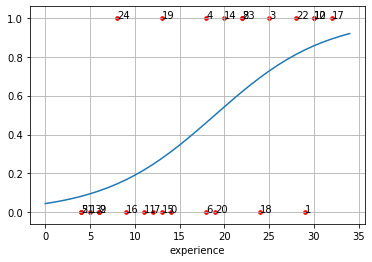

In [35]:
# plot
xaxis = range(35)
yaxis = model_glm.predict(sm.add_constant(xaxis))
plt.scatter(experience, success, s = 13, c = 'r')

plt.plot(xaxis,yaxis)

for i in range(n):
    plt.annotate(i,(experience[i],success[i]))

plt.xlabel('experience')
plt.grid()

In [36]:
result = np.zeros(n)

In [37]:
result[model_glm.predict() > 0.5] = 1
result

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0.])

In [38]:
pd.crosstab(result, success)

Success,0,1
row_0,,
0.0,11,3
1.0,3,8


In [39]:
# first row: when there is a failure (0), there are 11 times preditions for failure and 3 times for success

In [40]:
# error rate
6/10

0.6

In [41]:
# probability of a success with 22 months of experience

In [42]:
model_glm.predict([1,22])

array([0.62081158])

In [43]:
# probability of success is 0.62081158

# Validation approach with sm.GLM

In [44]:
np.random.seed(1)

In [45]:
# select training rows
rows = np.random.choice(24,17,replace = False)
rows

array([13, 18,  3, 14, 20, 17, 10,  4,  2, 19,  6,  7, 21,  1, 16,  0, 15])

In [46]:
data_train = data.loc[rows]

In [47]:
data_test = data.drop(rows)

In [48]:
# test features and target

In [61]:
success_test = data_test.Success

In [62]:
experience_test = data_test.Experience

In [63]:
# train values

In [64]:
success_train = data_train.Success

In [65]:
experience_train = data_train.Experience

In [66]:
# fit the train set, then predict the test set

In [67]:
model = sm.GLM(success_train, sm.add_constant(experience_train),family = sm.families.Binomial()).fit()

In [68]:
prediction = model.predict(sm.add_constant(experience_test))

In [69]:
result = np.zeros(len(success_test))
result[prediction > 0.5] = 1

In [70]:
pd.crosstab(result,success_test)

Success,0,1
row_0,,
0.0,3,3
1.0,0,2


In [71]:
# error rate
3/8

0.375

# Logistic Regression with sklearn

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [73]:
# in sklearn, features must be numpy arrays, not pandas series, not vectors

In [74]:
type(experience)

pandas.core.series.Series

In [75]:
experience = np.array(experience).reshape(-1,1)

In [76]:
experience.shape

(25, 1)

In [79]:
model = LogisticRegression(solver = 'lbfgs')

In [80]:
model.fit(experience,success)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
# without the "solver = 'lbfgs'" there will be an error msg
# because sklearn wants the user to specify which solver to use

In [82]:
model.coef_

array([[0.1608086]])

In [83]:
model.intercept_

array([-3.04760123])

In [84]:
# predict success if 22 months of experience

In [85]:
x_test = np.array(22).reshape(-1,1)

In [86]:
model.predict(x_test)

array([1], dtype=int64)

In [87]:
# model predicts a success with 22 months of experience

In [88]:
model.predict_proba(x_test)

array([[0.37984928, 0.62015072]])

In [89]:
# probability of success is 0.62015072

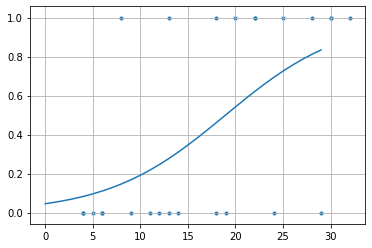

In [92]:
# plot
xaxis = np.array(range(30)).reshape(-1,1)
yaxis = model.predict_proba(xaxis)[:,1]
plt.scatter(experience, success, s = 9)
plt.plot(xaxis,yaxis)
plt.grid()

## Validation with sklearn

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(experience,success,
                                                    stratify=success,shuffle= True,
                                                    test_size = 0.30, random_state = 1)

In [100]:
model = LogisticRegression(solver = 'lbfgs').fit(X_train,Y_train)
results = model.predict(X_test)
results

array([1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [101]:
# error rate

In [102]:
pd.crosstab(results,Y_test)

Success,0,1
row_0,,
0,3,1
1,1,3


In [103]:
2/8

0.25